# Demo example: filling gaps and missing observations

This example is the continuation of the previous example: [Apply quality control](https://metobs-toolkit.readthedocs.io/en/latest/examples/qc_example.html). This example serves as a demonstration of how to fill gaps. 

In [1]:
import metobs_toolkit
your_dataset = metobs_toolkit.Dataset()
your_dataset.update_settings(
    input_data_file=metobs_toolkit.demo_datafile, # path to the data file
    input_metadata_file=metobs_toolkit.demo_metadatafile,
    template_file=metobs_toolkit.demo_template,
)

## Gaps

Gaps are periods, or moments, for which there are no observation values.
Therefore we can define a gap by:
 * Start of the gap 
 * End of the gap 
 * The observation type
 * The name of the station

In the toolkit, a gap is stored as an instance of ``metobs_toolkit.gap.Gap`` that holds this definition and methods for interacting/filling them.

Gaps are found by two criteria:
 1. The timestamps of the gap do not exist. To find these missing timestamps, the toolkit creates a set of expected timestamps. This set of expected timestamps ranges from the earliest to the last. The used frequency is derived from the observation records, as the *highest occurring observational frequency, different from 0*. This set is created **per station**, thus allowing for stations with different observation frequencies and different start/end timestamps.
 2. The values of an observation are not numerical. In practice, this is often the case when the value is missing in your datafile.

### real gaps

These gaps are always localized when importing your data from a file, automatically. Thus gaps are located, at the time-resolution of your input datafile and stored in the `Dataset.gaps` attribute as a list.

In [2]:
your_dataset.import_data_from_file() #Data is imported from the file, and the gaps are located (automatically) from your input file.

# Lets take a look at the first 6 found gaps
your_dataset.gaps[0:6] 

[temp-gap of vlinder01 for 2022-09-01 01:35:00+00:00 --> 2022-09-01 01:35:00+00:00, duration: 0 days 00:00:00,
 temp-gap of vlinder01 for 2022-09-01 02:35:00+00:00 --> 2022-09-01 02:45:00+00:00, duration: 0 days 00:10:00,
 temp-gap of vlinder01 for 2022-09-01 05:45:00+00:00 --> 2022-09-01 06:15:00+00:00, duration: 0 days 00:30:00,
 temp-gap of vlinder01 for 2022-09-01 07:30:00+00:00 --> 2022-09-01 07:35:00+00:00, duration: 0 days 00:05:00,
 temp-gap of vlinder01 for 2022-09-01 12:10:00+00:00 --> 2022-09-01 12:10:00+00:00, duration: 0 days 00:00:00,
 humidity-gap of vlinder01 for 2022-09-01 05:45:00+00:00 --> 2022-09-01 06:15:00+00:00, duration: 0 days 00:30:00]

We can see that a gap is defined by an observation type, the corresponding station name and a start and end timestamp. Since the inputfile contains observations at a 5-minutes resolution, the gaps are define at this resolution. 
For more detailed information we can use the ``get_info()`` method and take a look at the ``.gapdf`` attribute.

In [3]:
your_dataset.gaps[1].get_info() #Print out info of this gap

your_dataset.gaps[1].gapdf #This attribute hold the missing records of the gap.

---- Gap info -----
(Note: gaps start and end are defined on the frequency estimation of the native dataset.)
  * Gap for station: vlinder01
  * Start gap: 2022-09-01 02:35:00+00:00
  * End gap: 2022-09-01 02:45:00+00:00
  * Duration gap: 0 days 00:10:00
  * For temp
  * Gapfill status >>>> Unfilled gap
---- Gap Data Frame -----
                                     temp  temp_fill fill_method   msg
name      datetime                                                    
vlinder01 2022-09-01 02:35:00+00:00   NaN        NaN        None  None
          2022-09-01 02:40:00+00:00   NaN        NaN        None  None
          2022-09-01 02:45:00+00:00   NaN        NaN        None  None


temp  temp_fill fill_method   msg
name      datetime                                                    
vlinder01 2022-09-01 02:35:00+00:00   NaN        NaN        None  None
          2022-09-01 02:40:00+00:00   NaN        NaN        None  None
          2022-09-01 02:45:00+00:00   NaN        NaN        None  None

We can also see the gaps in a timeseries plot, when `colorby` is set to `"label"`. Vertical lines are used to indicate gaps.

<Axes: title={'center': 'Temperatuur of vlinder01'}, xlabel='datetime', ylabel='temp (Celsius)'>

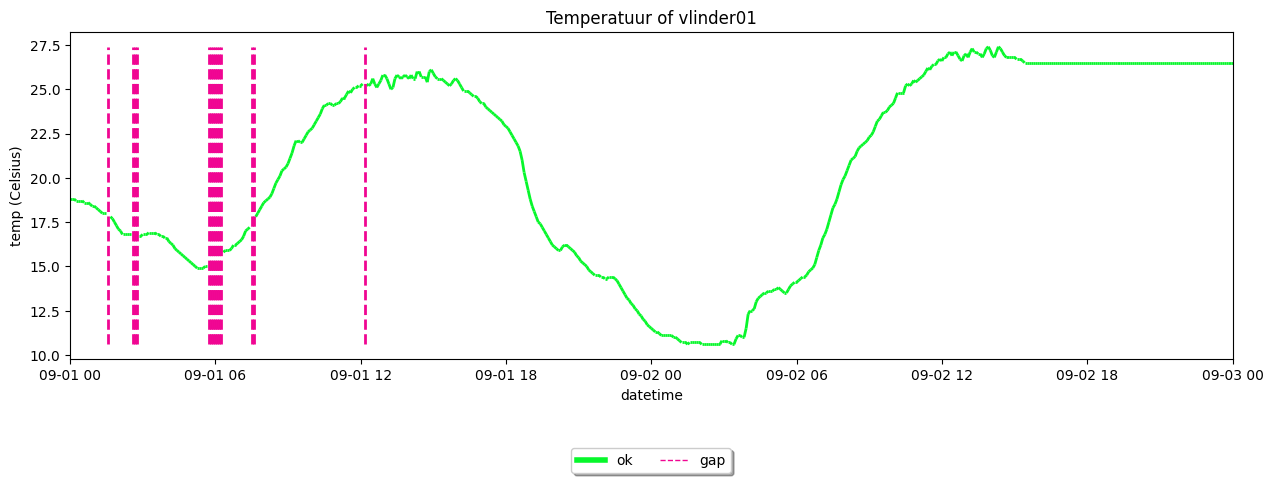

In [4]:
from datetime import datetime
your_dataset.get_station('vlinder01').make_plot(colorby='label',
                                                obstype='temp',
                                                endtime=datetime(2022,9,3))

For an overview of all gaps in the `Dataset`you can use the ``get_gaps_info()`` method.

In [5]:
your_dataset.get_gaps_info()

---- Gap info ----
 A total of 72 was found with:
 * for the following stations: ['vlinder01', 'vlinder07', 'vlinder06', 'vlinder14', 'vlinder08', 'vlinder11', 'vlinder28', 'vlinder10', 'vlinder26', 'vlinder12', 'vlinder13', 'vlinder24', 'vlinder17', 'vlinder03', 'vlinder05', 'vlinder25', 'vlinder22', 'vlinder21', 'vlinder27', 'vlinder23', 'vlinder20', 'vlinder09', 'vlinder19', 'vlinder04', 'vlinder15', 'vlinder18', 'vlinder16', 'vlinder02']
 * 7 gaps for temp of which 7 gaps exists are real.
  - Unfilled gap for 7 of the real ones.
 * 5 gaps for humidity of which 5 gaps exists are real.
  - Unfilled gap for 5 of the real ones.
 * 30 gaps for radiation_temp of which 30 gaps exists are real.
  - Unfilled gap for 30 of the real ones.
 * 5 gaps for pressure of which 5 gaps exists are real.
  - Unfilled gap for 5 of the real ones.
 * 5 gaps for pressure_at_sea_level of which 5 gaps exists are real.
  - Unfilled gap for 5 of the real ones.
 * 5 gaps for precip of which 5 gaps exists are rea

### Unreal gaps

When a gap holds records that are missing, the gap is *real*. But it can happen that some gaps do not hold missing records. This happens when the frequency resolution of the Dataset, that holds gaps, is coarsend. 


In [6]:
# We coarsen the time resolution to hourly:
your_dataset.coarsen_time_resolution(freq='60T')

# The definition of the gaps does not change:
your_dataset.gaps[0:6]

[temp-gap of vlinder01 for 2022-09-01 01:35:00+00:00 --> 2022-09-01 01:35:00+00:00, duration: 0 days 00:00:00,
 temp-gap of vlinder01 for 2022-09-01 02:35:00+00:00 --> 2022-09-01 02:45:00+00:00, duration: 0 days 00:10:00,
 temp-gap of vlinder01 for 2022-09-01 05:45:00+00:00 --> 2022-09-01 06:15:00+00:00, duration: 0 days 00:30:00,
 temp-gap of vlinder01 for 2022-09-01 07:30:00+00:00 --> 2022-09-01 07:35:00+00:00, duration: 0 days 00:05:00,
 temp-gap of vlinder01 for 2022-09-01 12:10:00+00:00 --> 2022-09-01 12:10:00+00:00, duration: 0 days 00:00:00,
 humidity-gap of vlinder01 for 2022-09-01 05:45:00+00:00 --> 2022-09-01 06:15:00+00:00, duration: 0 days 00:30:00]

But now some gaps have become *unreal*, because they do not have any missing records at an hourly resolution:

In [7]:
#How does the (10 minutes) gap look like:
your_dataset.gaps[1].get_info()


---- Gap info -----
(Note: gaps start and end are defined on the frequency estimation of the native dataset.)
  * Gap for station: vlinder01
  * Start gap: 2022-09-01 02:35:00+00:00
  * End gap: 2022-09-01 02:45:00+00:00
  * Duration gap: 0 days 00:10:00
  * For temp
  * Gapfill status >>>> Gap does not exist in observation space
The gap is unreal (=no missing records at the current frequency resolution).


We can see that the gap does not hold any missing records, and is thus unreal.

When plotting the timeseries, we can see that some gaps are 'lost' because they become unreal at an hourly resolution.

<Axes: title={'center': 'Temperatuur of vlinder01'}, xlabel='datetime', ylabel='temp (Celsius)'>

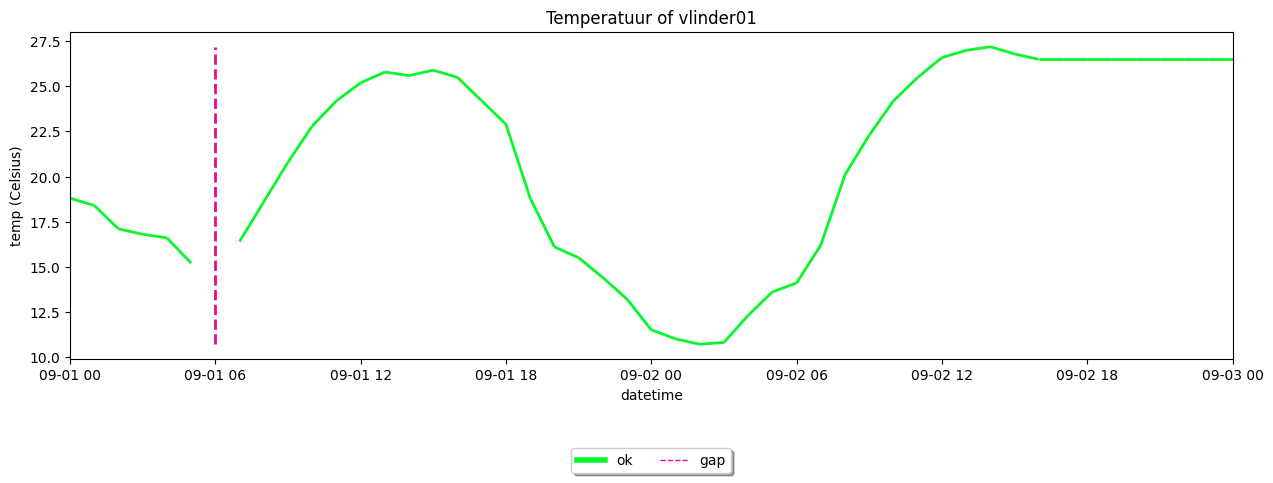

In [8]:
from datetime import datetime
your_dataset.get_station('vlinder01').make_plot(colorby='label',
                                                obstype='temp',
                                                endtime=datetime(2022,9,3))

## Outliers to gaps and missing observations

In practice, it is a common method to interpret observations flagged by quality control as gaps and fill them. 
In the toolkit, it is possible to convert the outliers to gaps by using the ``convert_outliers_to_gaps`` method.

In [9]:
#first apply (default) quality control
your_dataset.apply_quality_control(obstype='temp') #we use the default settings in this example

#Convert the outliers to gaps.
your_dataset.convert_outliers_to_gaps()

your_dataset

Warning! The current gaps will be removed and new gaps are formed!
Warning! The current gaps are defined at a resolution different from the assumed import resolution!


Dataset instance containing: 
     *28 stations 
     *['temp', 'humidity', 'radiation_temp', 'pressure', 'pressure_at_sea_level', 'precip', 'precip_sum', 'wind_speed', 'wind_gust', 'wind_direction'] observation types 
     *10080 observation records 
     *0 records labeled as outliers 
     *117 gaps 
     *records range: 2022-09-01 00:00:00+00:00 --> 2022-09-15 23:00:00+00:00 (total duration:  14 days 23:00:00) 
     *time zone of the records: UTC 
     *Coordinates are available for all stations.

We can see that there are currently no outliers in the `Dataset` and that they are converted to gaps. What can also be seen in a plot.

<Axes: title={'center': 'Temperatuur of vlinder05'}, xlabel='datetime', ylabel='temp (Celsius)'>

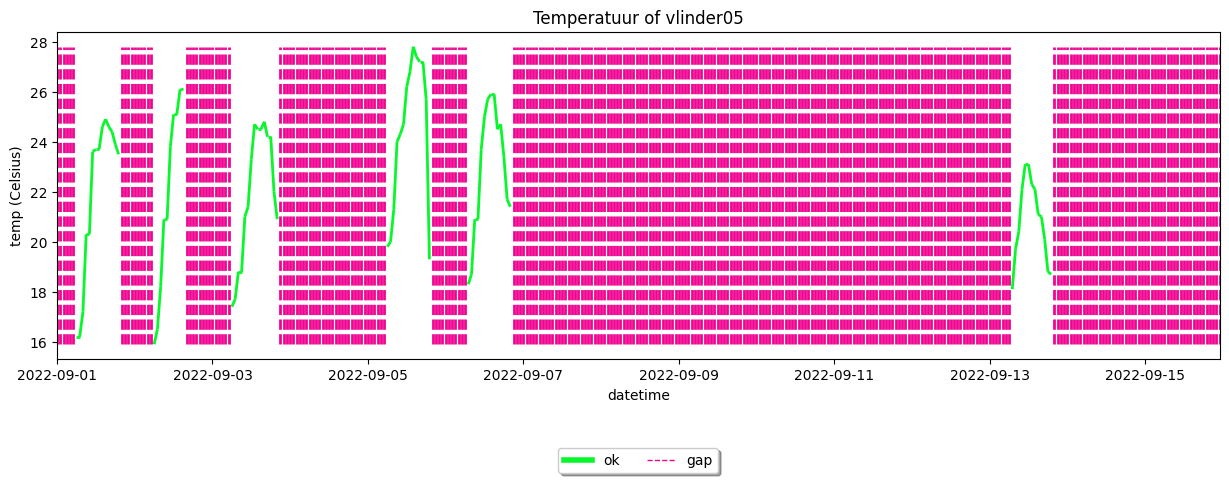

In [10]:
your_dataset.get_station('vlinder05').make_plot(colorby='label')

# Fill gaps

There are a lot of methods to fill gaps in timeseries. In the toolkit some of these methods are implemented wich we can group by:

* Interpolation methods
* Using external modeldata

In the following sections, a demonstration of these methods is given. A shared concept among these techniques are the *anchor* observations. These are observations, assumed to be correct thus no outlers, that are used to fill a gap.  

## Interpolation
Interpolation is a common method for filling gaps. Interpolation uses the observations to fill the missing records of the gap. In the toolkit this is done by looking for a **leading** and **trailing** observation, which is the last observation before and the first observation after the gap and serves as *anchors*. 

To fill gaps using interpolation we use the ``interpolate_gaps()`` method, to interpolate all gaps.

Warning! Cannot fill temp-gap of vlinder05 for 2022-09-01 00:00:00+00:00 --> 2022-09-01 05:00:00+00:00, duration: 0 days 05:00:00, because leading record is not valid.
Warning! Cannot fill temp-gap of vlinder05 for 2022-09-13 20:00:00+00:00 --> 2022-09-15 23:00:00+00:00, duration: 2 days 03:00:00, because trailing record is not valid.


<Axes: title={'center': 'Temperatuur of vlinder05'}, xlabel='datetime', ylabel='temp (Celsius)'>

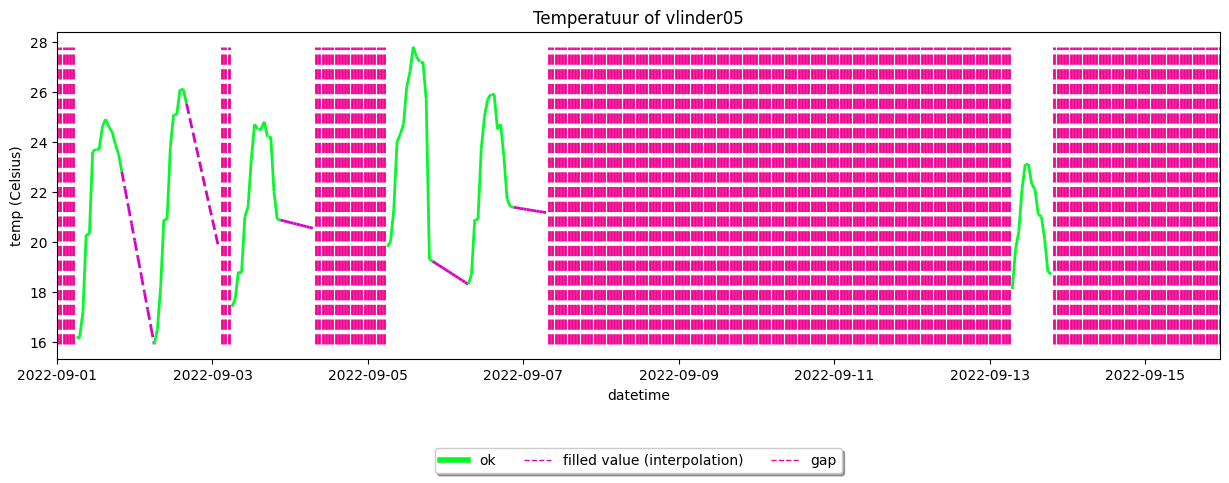

In [11]:
# Goal: interpolate the temperature gaps of the station vlinder05
your_station = your_dataset.get_station('vlinder05')

#Interpolate all temperature gaps
your_dataset.interpolate_gaps(obstype='temp',
                              overwrite_fill=True, #Overwrite the filled values if they already exist
                              method='time', # The interpolation method to use (see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html for all possible methods)
                              max_consec_fill = 11, #The maximum number of records to fill
                              max_lead_to_gap_distance='2H', # (=2 hours) The maximum interval between the leading timestamp and the start of the gap. 
                              max_trail_to_gap_distance='2H')

# Make a plot
your_station.make_plot(colorby='label')


As can be seen in the plot, some gaps are filled, some gaps are not filled and some are partially filled. For more details on the interpolation we can look in the `anchordf` and `gapdf` attributes:


In [12]:
#The gapdf attribute holds information on how the gaprecords are filled
your_station.gaps[0].gapdf

temp  temp_fill    fill_method  \
name      datetime                                                    
vlinder05 2022-09-01 00:00:00+00:00   NaN        NaN  interpolation   
          2022-09-01 01:00:00+00:00   NaN        NaN  interpolation   
          2022-09-01 02:00:00+00:00   NaN        NaN  interpolation   
          2022-09-01 03:00:00+00:00   NaN        NaN  interpolation   
          2022-09-01 04:00:00+00:00   NaN        NaN  interpolation   
          2022-09-01 05:00:00+00:00   NaN        NaN  interpolation   

                                                                             msg  \
name      datetime                                                                 
vlinder05 2022-09-01 00:00:00+00:00  no leading record candidate could be found.   
          2022-09-01 01:00:00+00:00  no leading record candidate could be found.   
          2022-09-01 02:00:00+00:00  no leading record candidate could be found.   
          2022-09-01 03:00:00+00:00  no leading record candidate could be found.   
          2022-09-01 04:00:00+00:00  no leading record candidate could be found.   
          2022-09-01 05:00:00+00:00  no leading record candidate could be found.   

                                    obstype  
name      datetime                           
vlinder05 2022-09-01 00:00:00+00:00    temp  
          2022-09-01 01:00:00+00:00    temp  
          2022-09-01 02:00:00+00:00    temp  
          2022-09-01 03:00:00+00:00    temp  
          2022-09-01 04:00:00+00:00    temp  
          2022-09-01 05:00:00+00:00    temp

In [13]:
#The anchordf attribute holds all the anchors
your_station.gaps[0].anchordf

temp fill_method  \
name      datetime                                      
vlinder05 NaT                         NaN     leading   
          2022-09-01 06:00:00+00:00  16.2    trailing   

                                                                             msg  
name      datetime                                                                
vlinder05 NaT                        no leading record candidate could be found.  
          2022-09-01 06:00:00+00:00                                           ok

We can see that the first gap could not be interpolated since there is no leading anchor.
Use the ``get_gaps_fill_df`` method, which combines the `anchorsdf` and `gapfilldf` into one dataframe for all gaps.


In [14]:
#Get all gapfill info for all gaps of vlinder05
all_gaps_info_df = your_station.get_gaps_fill_df()

#Filter the info to temperature gaps
temperature_gap_info_df = all_gaps_info_df.xs('temp', level='obstype')

temperature_gap_info_df


fill    fill_method  \
name      datetime                                         
vlinder05 2022-09-01 00:00:00+00:00   NaN  interpolation   
          2022-09-01 01:00:00+00:00   NaN  interpolation   
          2022-09-01 02:00:00+00:00   NaN  interpolation   
          2022-09-01 03:00:00+00:00   NaN  interpolation   
          2022-09-01 04:00:00+00:00   NaN  interpolation   
...                                   ...            ...   
          2022-09-15 21:00:00+00:00   NaN  interpolation   
          2022-09-15 22:00:00+00:00   NaN  interpolation   
          2022-09-15 23:00:00+00:00   NaN  interpolation   
          NaT                         NaN        leading   
          NaT                         NaN       trailing   

                                                                              msg  \
name      datetime                                                                  
vlinder05 2022-09-01 00:00:00+00:00   no leading record candidate could be found.   
          2022-09-01 01:00:00+00:00   no leading record candidate could be found.   
          2022-09-01 02:00:00+00:00   no leading record candidate could be found.   
          2022-09-01 03:00:00+00:00   no leading record candidate could be found.   
          2022-09-01 04:00:00+00:00   no leading record candidate could be found.   
...                                                                           ...   
          2022-09-15 21:00:00+00:00  no trailing record candidate could be found.   
          2022-09-15 22:00:00+00:00  no trailing record candidate could be found.   
          2022-09-15 23:00:00+00:00  no trailing record candidate could be found.   
          NaT                         no leading record candidate could be found.   
          NaT                        no trailing record candidate could be found.   

                                                                                gap_ID  
name      datetime                                                                      
vlinder05 2022-09-01 00:00:00+00:00  vlinder05;2022-09-01 00:00:00+00:00;2022-09-01...  
          2022-09-01 01:00:00+00:00  vlinder05;2022-09-01 00:00:00+00:00;2022-09-01...  
          2022-09-01 02:00:00+00:00  vlinder05;2022-09-01 00:00:00+00:00;2022-09-01...  
          2022-09-01 03:00:00+00:00  vlinder05;2022-09-01 00:00:00+00:00;2022-09-01...  
          2022-09-01 04:00:00+00:00  vlinder05;2022-09-01 00:00:00+00:00;2022-09-01...  
...                                                                                ...  
          2022-09-15 21:00:00+00:00  vlinder05;2022-09-13 20:00:00+00:00;2022-09-15...  
          2022-09-15 22:00:00+00:00  vlinder05;2022-09-13 20:00:00+00:00;2022-09-15...  
          2022-09-15 23:00:00+00:00  vlinder05;2022-09-13 20:00:00+00:00;2022-09-15...  
          NaT                        vlinder05;2022-09-01 00:00:00+00:00;2022-09-01...  
          NaT                        vlinder05;2022-09-13 20:00:00+00:00;2022-09-15...  

[294 rows x 4 columns]

We can see that the first gap could not be interpolated since there is no leading anchor.

## Fill gaps using modeldata

Because gaps can span longer periods, interpolation is not (always) the most suitable method to fill the gaps. For longer gaps, it is better to use external modeldata to fill these gaps. As a demonstration, ERA5 modeldata will be used to fill the gaps. 

The following techniques of gapfill with modeldata are implemented in the toolkit:
 * ``fill_gaps_with_raw_modeldata``: Modeldata is used to fill in the gap records.
 * ``fill_gaps_with_debias_modeldata``: For each station, the Modeldata is debiased using a leading and trailing period. The model data is corrected with this bias, and then used to fill in the gap.
 *  ``fill_gaps_with_diurnal_debias_modeldata``: For each station, the Modeldata is debiased using a leading and trailing period. The biases are computed for each diurnal timestamp separately. The model data is corrected with these biases and then used to fill in the gap.
 *  ``fill_gaps_with_weighted_diurnal_debias_modeldata``: For each station, the Modeldata is debiased using a leading and trailing period. The biases are computed for each diurnal timestamp and leading/trailing period separately. A normalized weight is given to each record in the gap indicating the distance (in time) to the start and end of the gap. The model data is corrected with these leading and trailing diurnal biases and weights are applied. The gap is filled with these corrected values. 

Here is an example on how to use these methods to fill the temperature gaps. As modeldata we use ERA5 data, which is extracted from GEE.



(When using the .set_model_from_csv() method, make sure the modelname of your Modeldata is ERA5_hourly)


<Axes: title={'center': 'Temperatuur of vlinder05'}, xlabel='datetime', ylabel='temp (Celsius)'>

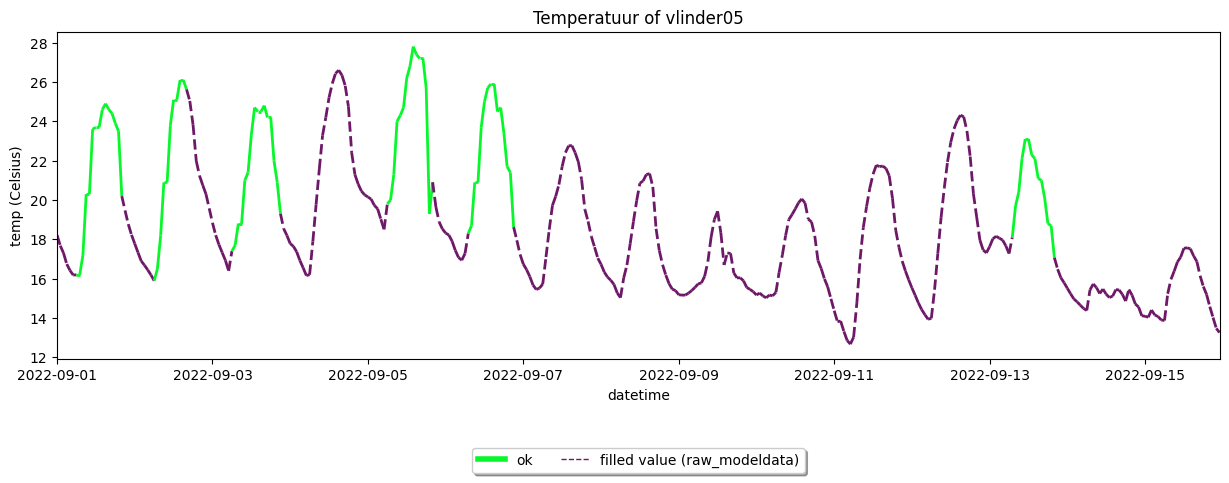

In [15]:
#Get ERA5 modeldata at the location of your stations and period.
ERA5_modeldata = your_station.get_modeldata(modelname='ERA5_hourly',
                                            obstype='temp')

#Use the uncorrected modeldata to fill the gaps
your_station.fill_gaps_with_raw_modeldata(Modeldata=ERA5_modeldata,
                                          obstype='temp',
                                          overwrite_fill=True)

#Plot the timeseries
your_station.make_plot(obstype='temp', colorby='label')

As an example the other gapfill techniques are applied, and plotted aswell.

Warning!  Cannot fill temp-gap of vlinder05 for 2022-09-01 00:00:00+00:00 --> 2022-09-01 05:00:00+00:00, duration: 0 days 05:00:00, because leading period is not valid.
Warning!  Cannot fill temp-gap of vlinder05 for 2022-09-13 20:00:00+00:00 --> 2022-09-15 23:00:00+00:00, duration: 2 days 03:00:00, because trailing period is not valid.


/home/thoverga/Documents/VLINDER_github/MetObs_toolkit/metobs_toolkit/gap.py:901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anchordf["msg"] = "_init_"  # these will be overwritten
/home/thoverga/Documents/VLINDER_github/MetObs_toolkit/metobs_toolkit/gap.py:901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anchordf["msg"] = "_init_"  # these will be overwritten
/home/thoverga/Documents/VLINDER_github/MetObs_toolkit/metobs_toolkit/gap.py:901: SettingWithCopyWarning: 
A value is trying to be set on a copy

<Axes: title={'center': 'Weighted diurnal debias modeldata gapfill for vlinder05'}, xlabel='datetime', ylabel='temp (Celsius)'>

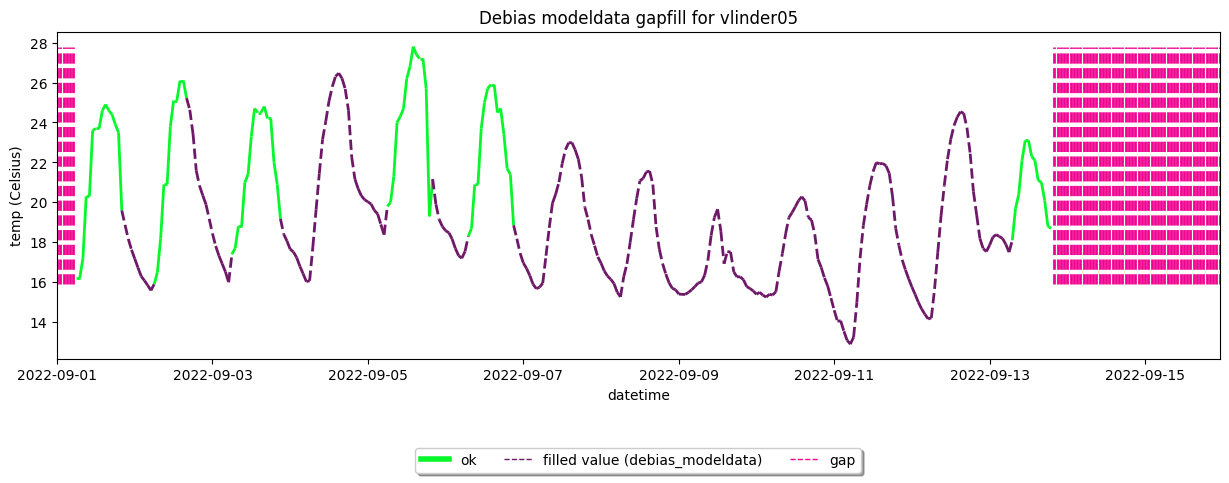

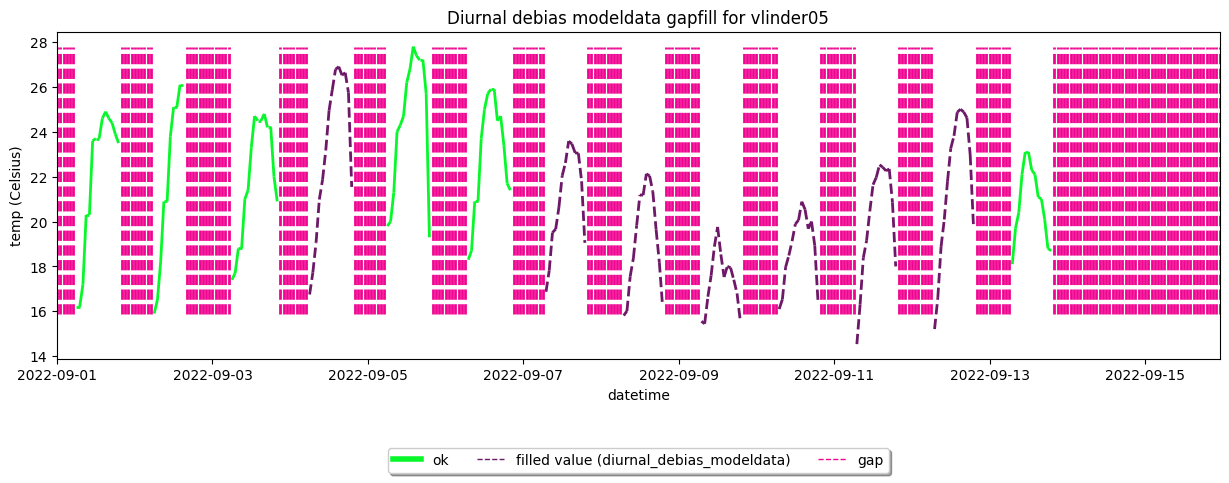

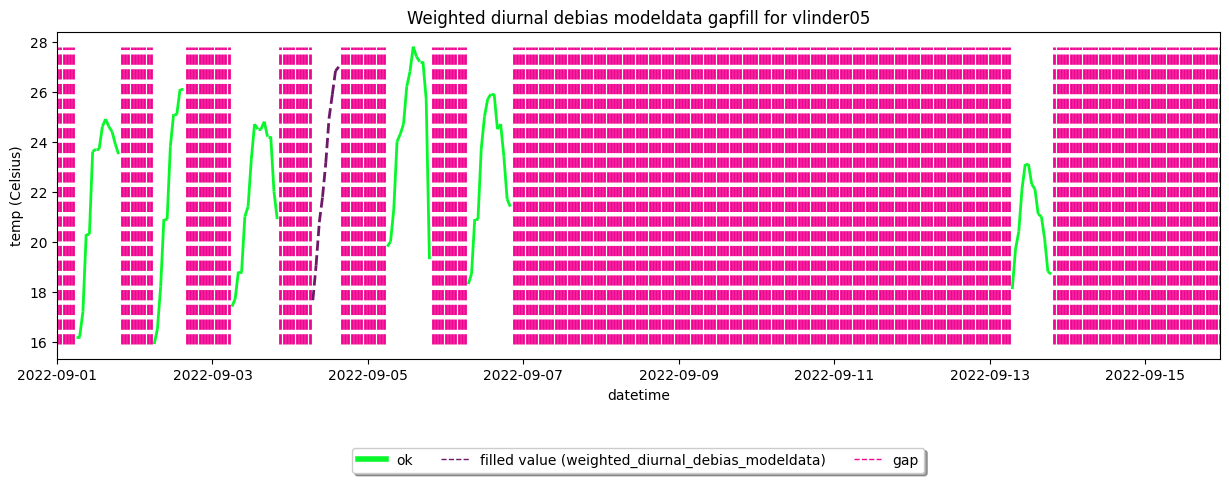

In [16]:
# Debias gapfill
your_station.fill_gaps_with_debias_modeldata(
        Modeldata = ERA5_modeldata,
        obstype="temp",
        overwrite_fill=True,
        leading_period_duration="24H", #The maximum size (in timedelta) of the leading period.
        min_leading_records_total=5, # The minimum number of leading records.
        trailing_period_duration="24H", 
        min_trailing_records_total=5, # The minimum number of trailing records.
    )

your_station.make_plot(obstype='temp', colorby='label', title='Debias modeldata gapfill for vlinder05')


# Debias diurnal gapfill
your_station.fill_gaps_with_diurnal_debias_modeldata(
        Modeldata = ERA5_modeldata,
        obstype="temp",
        overwrite_fill=True,
        leading_period_duration="48H", # The maximum size (in timedelta) of the leading period.
        min_debias_sample_size=3, # The minimum number of records (samplesize) to calculate a bias for.
        trailing_period_duration="48H" # The maximum size (in timedelta) of the trailing period.
    )
your_station.make_plot(obstype='temp', colorby='label', title='Diurnal debias modeldata gapfill for vlinder05')

# Debias diurnal gapfill
your_station.fill_gaps_with_weighted_diurnal_debias_modeldata(
        Modeldata = ERA5_modeldata,
        obstype="temp",
        overwrite_fill=True,
        leading_period_duration="48H", 
        min_lead_debias_sample_size=2, # The minimum number of records (samplesize) to calculate leading biases for.
        min_trail_debias_sample_size=2, # The minimum number of records (samplesize) to calculate trailing biases for.
        trailing_period_duration="48H" # The maximum size (in timedelta) of the trailing period.
    )
your_station.make_plot(obstype='temp', colorby='label', title='Weighted diurnal debias modeldata gapfill for vlinder05')


It can be seen that (some) gaps are (partially) filled. By adjusting the settings, you can stringent or loosen the anchor's criteria to fill more/fewer gaps. As demonstrated before, the ``get_gaps_fill_df()`` method can give more information on how a gapfill method is performing. 

In [17]:
#Get all gapfill info for all gaps of vlinder05

all_gaps_info_df = your_station.get_gaps_fill_df()
temperature_gap_info_df = all_gaps_info_df.xs('temp', level='obstype') #Filter the info to temperature gaps
temperature_gap_info_df

fill                        fill_method  \
name      datetime                                                             
vlinder05 2022-09-01 00:00:00+00:00   NaN  weighted_diurnal_debias_modeldata   
          2022-09-01 01:00:00+00:00   NaN  weighted_diurnal_debias_modeldata   
          2022-09-01 02:00:00+00:00   NaN  weighted_diurnal_debias_modeldata   
          2022-09-01 03:00:00+00:00   NaN  weighted_diurnal_debias_modeldata   
          2022-09-01 04:00:00+00:00   NaN  weighted_diurnal_debias_modeldata   
...                                   ...                                ...   
          2022-09-15 19:00:00+00:00   NaN  weighted_diurnal_debias_modeldata   
          2022-09-15 20:00:00+00:00   NaN  weighted_diurnal_debias_modeldata   
          2022-09-15 21:00:00+00:00   NaN  weighted_diurnal_debias_modeldata   
          2022-09-15 22:00:00+00:00   NaN  weighted_diurnal_debias_modeldata   
          2022-09-15 23:00:00+00:00   NaN  weighted_diurnal_debias_modeldata   

                                                                                   msg  \
name      datetime                                                                       
vlinder05 2022-09-01 00:00:00+00:00  Modelvalue: 18.22 cannot be corrected because ...   
          2022-09-01 01:00:00+00:00  Modelvalue: 17.68 cannot be corrected because ...   
          2022-09-01 02:00:00+00:00  Modelvalue: 17.31 cannot be corrected because ...   
          2022-09-01 03:00:00+00:00  Modelvalue: 16.74 cannot be corrected because ...   
          2022-09-01 04:00:00+00:00  Modelvalue: 16.42 cannot be corrected because ...   
...                                                                                ...   
          2022-09-15 19:00:00+00:00  Modelvalue: 15.20 cannot be corrected because ...   
          2022-09-15 20:00:00+00:00  Modelvalue: 14.58 cannot be corrected because ...   
          2022-09-15 21:00:00+00:00  Modelvalue: 14.02 cannot be corrected because ...   
          2022-09-15 22:00:00+00:00  Modelvalue: 13.48 cannot be corrected because ...   
          2022-09-15 23:00:00+00:00  Modelvalue: 13.26 cannot be corrected because ...   

                                                                                gap_ID  
name      datetime                                                                      
vlinder05 2022-09-01 00:00:00+00:00  vlinder05;2022-09-01 00:00:00+00:00;2022-09-01...  
          2022-09-01 01:00:00+00:00  vlinder05;2022-09-01 00:00:00+00:00;2022-09-01...  
          2022-09-01 02:00:00+00:00  vlinder05;2022-09-01 00:00:00+00:00;2022-09-01...  
          2022-09-01 03:00:00+00:00  vlinder05;2022-09-01 00:00:00+00:00;2022-09-01...  
          2022-09-01 04:00:00+00:00  vlinder05;2022-09-01 00:00:00+00:00;2022-09-01...  
...                                                                                ...  
          2022-09-15 19:00:00+00:00  vlinder05;2022-09-13 20:00:00+00:00;2022-09-15...  
          2022-09-15 20:00:00+00:00  vlinder05;2022-09-13 20:00:00+00:00;2022-09-15...  
          2022-09-15 21:00:00+00:00  vlinder05;2022-09-13 20:00:00+00:00;2022-09-15...  
          2022-09-15 22:00:00+00:00  vlinder05;2022-09-13 20:00:00+00:00;2022-09-15...  
          2022-09-15 23:00:00+00:00  vlinder05;2022-09-13 20:00:00+00:00;2022-09-15...  

[518 rows x 4 columns]

## Example: duration specific gapfill method

Here is an example on how to set up a gapfill strategy that uses interpolation if the gap duration is less than 10 hours. Else a debias gapfill if applied. 

Warning! The current gaps will be removed and new gaps are formed!
Warning! The current gaps are defined at a resolution different from the assumed import resolution!
(When using the .set_model_from_csv() method, make sure the modelname of your Modeldata is ERA5_hourly)
Warning! Cannot fill temp-gap of vlinder05 for 2022-09-01 00:00:00+00:00 --> 2022-09-01 05:00:00+00:00, duration: 0 days 05:00:00, because leading record is not valid.
Warning!  Cannot fill temp-gap of vlinder05 for 2022-09-13 20:00:00+00:00 --> 2022-09-15 23:00:00+00:00, duration: 2 days 03:00:00, because trailing period is not valid.
Warning!  Cannot fill radiation_temp-gap of vlinder05 for 2022-09-01 00:00:00+00:00 --> 2022-09-15 23:00:00+00:00, duration: 14 days 23:00:00, because leading and trailing periods are not valid.


<Axes: title={'center': 'Temperatuur of vlinder05'}, xlabel='datetime', ylabel='temp (Celsius)'>

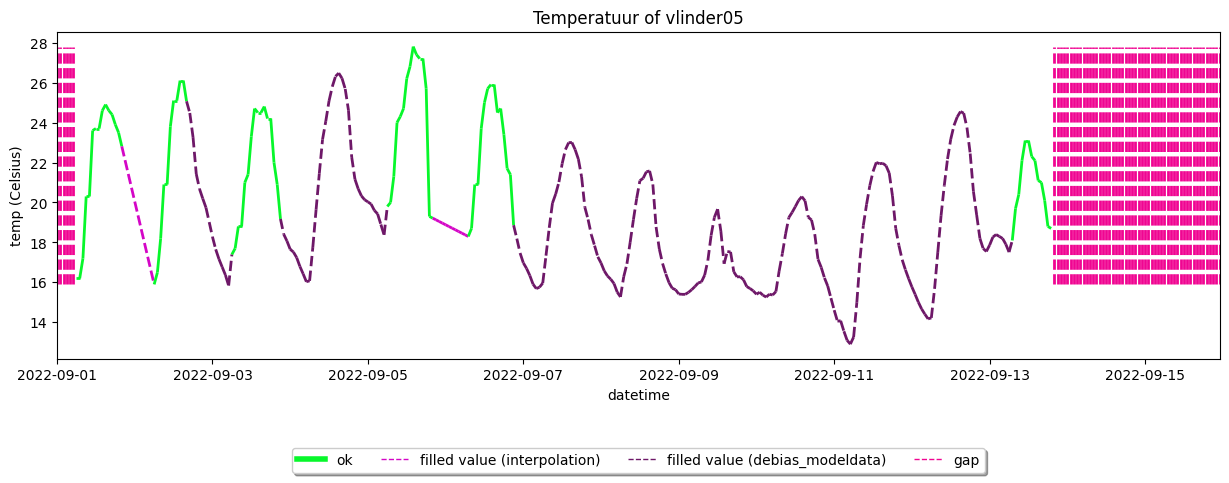

In [18]:
from datetime import timedelta

# Import data into a Dataset
dataset = metobs_toolkit.Dataset()
dataset.update_settings(
                          input_data_file=metobs_toolkit.demo_datafile,
                          input_metadata_file=metobs_toolkit.demo_metadatafile,
                          template_file=metobs_toolkit.demo_template,
                          )
dataset.import_data_from_file()
dataset.coarsen_time_resolution(freq='1H')

# Subset to one station
station = dataset.get_station('vlinder05')
station.apply_quality_control()
station.convert_outliers_to_gaps()

#Get ERA5 modeldata at the location of your stations and period.
ERA5_modeldata = station.get_modeldata(modelname='ERA5_hourly',
                                            obstype='temp')

#Iterate over all gaps
max_interpolation_duration = timedelta(hours=10)

for gap in station.gaps:
    if gap.duration <= max_interpolation_duration:
        # Short gaps
        gap.interpolate_gap(
                            Dataset=station,
                            method="time",
                            max_consec_fill=100   
                        )
    else:
        # long gaps
         gap.debias_model_gapfill(
                            Dataset = station,
                            Modeldata = ERA5_modeldata,
                            leading_period_duration="48H",
                            min_leading_records_total=10,
                            trailing_period_duration="48H",
                            min_trailing_records_total=10,
                        )
station.make_plot(colorby='label')